In [1]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(threshold=100)

In [2]:
# Generating 2,000 readers' reponse. 
# Assuming the claps follow a Bernoulli process - a sequence of binary (success/failure) random variables.
# 1 means clap. 0 means no clap.
# We pick the success rate of 30%.
clap_prob = 0.3
# IID (independent and identically distributed) assumption
clap_data = np.random.binomial(n=1, p=clap_prob, size=2000)

# Step 1. Prior P(θ)

사전분포를 베타분포로 구성한다.
P(θ)의 θ는 '박수를 받을 "확률"'이니 
P(θ)는 즉, '''박수를 받을 확률에 대한 확률'''이 되는 것이다. 

그럼 확률에 대한 확률 분포를 구성하기 위해선 어떻게 해야 하는것일까?...

우리가 θ를 30%라고 설정하기는 했지만, 베타분포(사전분포)를 통해 나타내면 0.2%가 최선의 선택같아 보이긴 한다.

In [3]:
a = 400
b = 2000 - a
# domain θ
theta_range = np.linspace(0, 1, 1000)
# prior P(θ)
prior = stats.beta.pdf(x = theta_range, a=a, b=b)

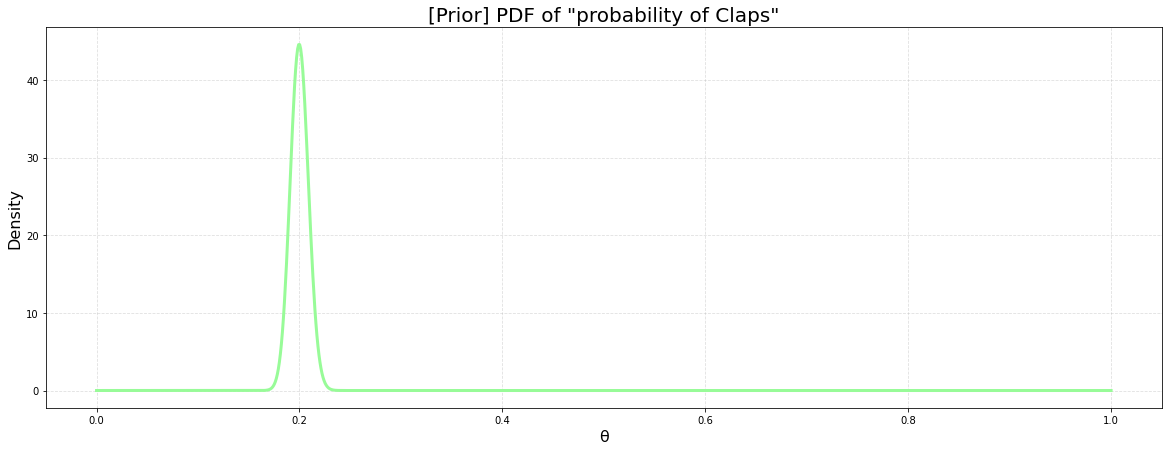

In [4]:
# Plotting the prior distribution
plt.rcParams['figure.figsize'] = [20,7]
fig, ax = plt.subplots()
plt.plot(theta_range, prior, linewidth=3, color='palegreen')

# Add a title
plt.title('[Prior] PDF of "probability of Claps"', fontsize=20)

# Add X and y Lable
plt.xlabel('θ', fontsize=16)
plt.ylabel('Density', fontsize=16)

# Add a grid
plt.grid(alpha=.4, linestyle='--')

# Show the plot
plt.show()

In [5]:
# The sampling dist P(X|θ) with a given clap_prob(θ)
likelihood = stats.binom.pmf(k = np.sum(clap_data), n = len(clap_data), p = clap_prob)

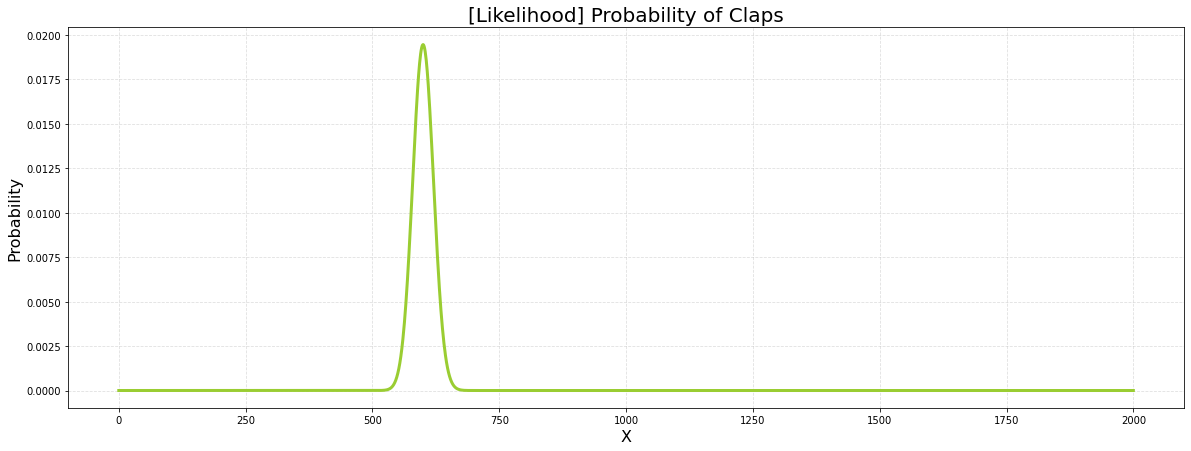

In [6]:
# Domain (# of claps)
X = np.arange(0, len(clap_data)+1)
# Likelihood P(X|θ) for all X's
likelihood = stats.binom.pmf(k = X, n = len(clap_data), p = clap_prob)
# Create the plot
fig, ax = plt.subplots()
plt.plot(X, likelihood, linewidth=3, color='yellowgreen')
# Add a title
plt.title('[Likelihood] Probability of Claps' , fontsize=20)
# Add X and y Label
plt.xlabel('X', fontsize=16)
plt.ylabel('Probability', fontsize=16)
# Add a grid
plt.grid(alpha=.4, linestyle='--')
# Show the plot
plt.show()

In [7]:
# (cont.)
theta_range_e = theta_range + 0.001 
prior = stats.beta.cdf(x = theta_range_e, a=a, b=b) - stats.beta.cdf(x = theta_range, a=a, b=b) 
# prior = stats.beta.pdf(x = theta_range, a=a, b=b)
likelihood = stats.binom.pmf(k = np.sum(clap_data), n = len(clap_data), p = theta_range) 
posterior = likelihood * prior 
normalized_posterior = posterior / np.sum(posterior)

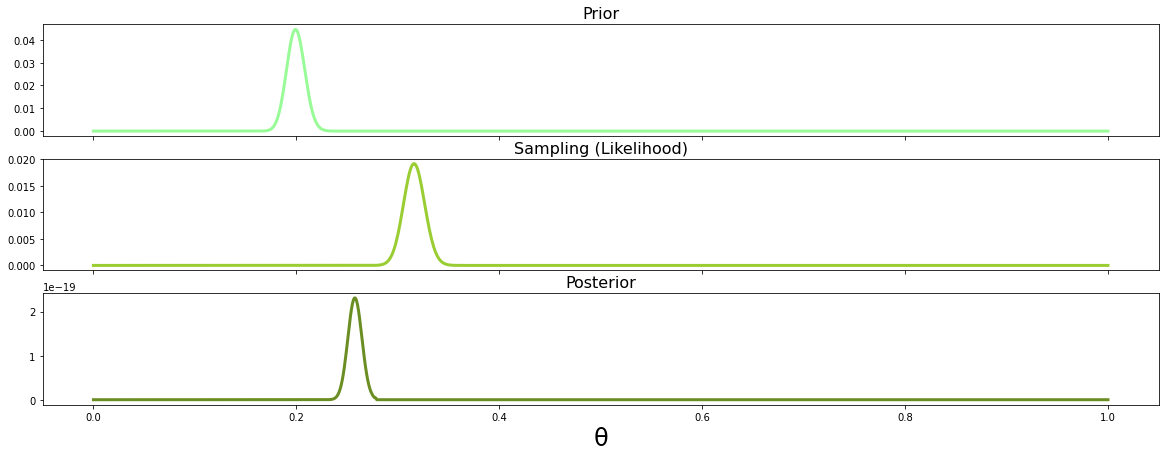

In [8]:
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(20,7))
plt.xlabel('θ', fontsize=24)
axes[0].plot(theta_range, prior, label="Prior", linewidth=3, color='palegreen')
axes[0].set_title("Prior", fontsize=16)
axes[1].plot(theta_range, likelihood, label="Likelihood", linewidth=3, color='yellowgreen')
axes[1].set_title("Sampling (Likelihood)", fontsize=16)
axes[2].plot(theta_range, posterior, label='Posterior', linewidth=3, color='olivedrab')
axes[2].set_title("Posterior", fontsize=16)
plt.show()

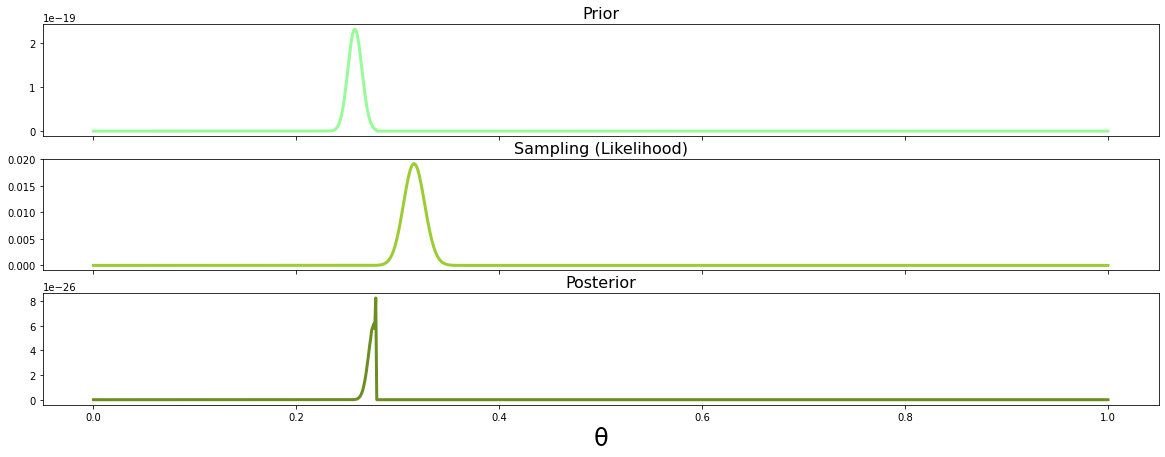

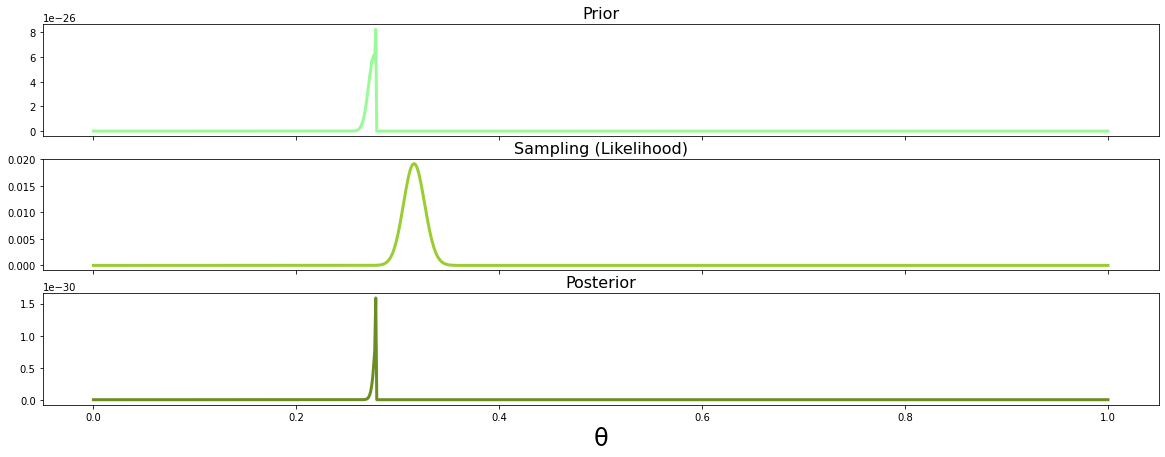

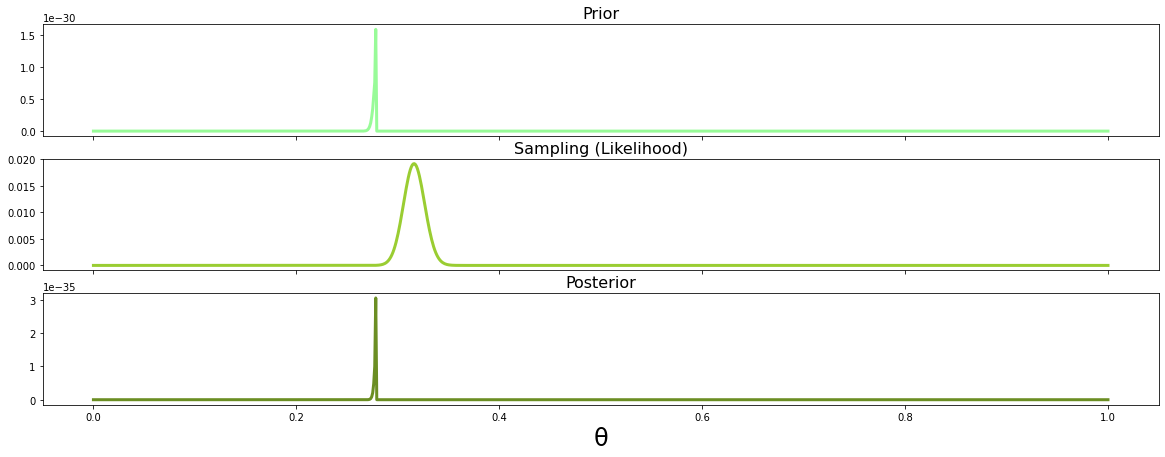

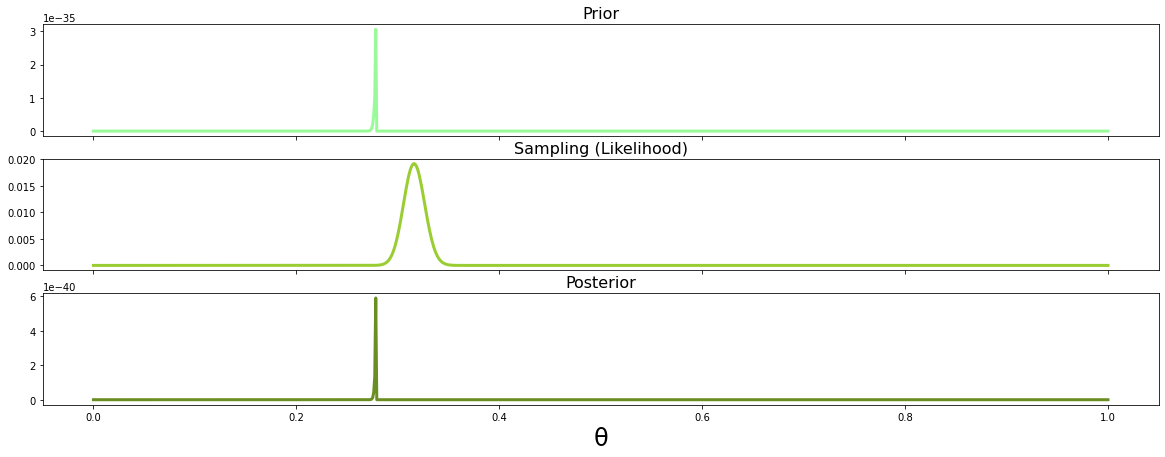

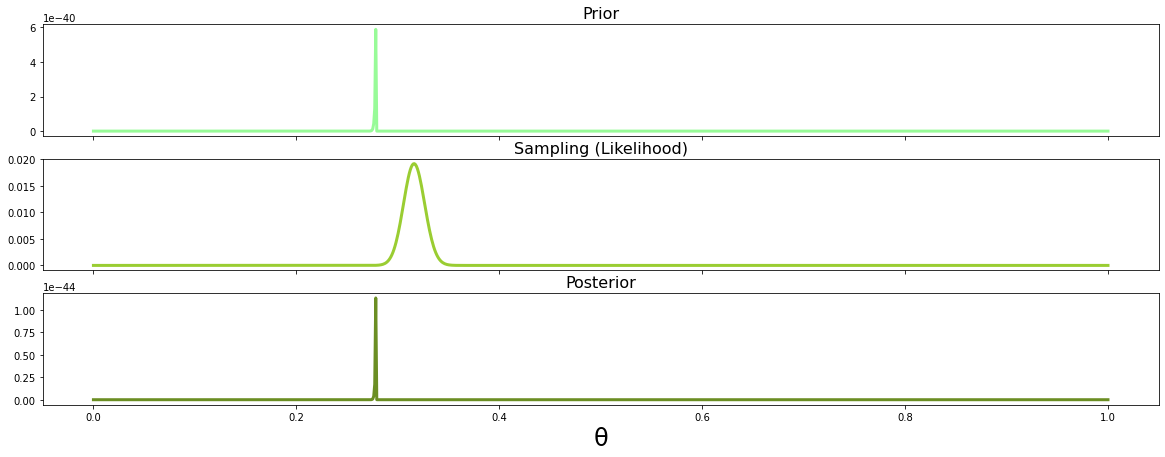

In [9]:
for i in range(5):
    prior = posterior
    likelihood = stats.binom.pmf(k = np.sum(clap_data), n = len(clap_data), p = theta_range) 
    posterior = likelihood * prior 
    fig, axes = plt.subplots(3, 1, sharex=True, figsize=(20,7))
    plt.xlabel('θ', fontsize=24)
    plt.title(f'round {i}')
    axes[0].plot(theta_range, prior, label="Prior", linewidth=3, color='palegreen')
    axes[0].set_title("Prior", fontsize=16)
    axes[1].plot(theta_range, likelihood, label="Likelihood", linewidth=3, color='yellowgreen')
    axes[1].set_title("Sampling (Likelihood)", fontsize=16)
    axes[2].plot(theta_range, posterior, label='Posterior', linewidth=3, color='olivedrab')
    axes[2].set_title("Posterior", fontsize=16)
    plt.show()

Q: 아니 그럼 애초에 prior가 왜 필요한거야?...
    
MAP와 MLE의 관계는 무엇인가??